In [8]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# 값 스케일 정규화

In [9]:
df=pd.read_csv('CNN/data/005930.KS.csv')
df=df.set_index(pd.to_datetime(df['Date']))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-04,2000-01-04,6000.0,6110.0,5660.0,6110.0,4514.582031,74195000
2000-01-05,2000-01-05,5800.0,6060.0,5520.0,5580.0,4122.972656,74680000
2000-01-06,2000-01-06,5750.0,5780.0,5580.0,5620.0,4152.528320,54390000
2000-01-07,2000-01-07,5560.0,5670.0,5360.0,5540.0,4093.417480,40305000
2000-01-10,2000-01-10,5600.0,5770.0,5580.0,5770.0,4263.361328,46880000


In [10]:
df=df[['Open', 'High','Low','Close', 'Volume', 'Adj Close']]
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000,4514.582031
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000,4122.972656
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000,4152.528320
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000,4093.417480
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000,4263.361328


In [11]:
seq_length=7
batch=100
#df1=df[::-1]

In [12]:
train_size=int(len(df)*0.9)
train_set=df[0:train_size]
test_set=df[train_size-seq_length:]
print(train_set.shape, test_set.shape)

(5360, 6) (603, 6)


In [13]:
train_set.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000,4514.582031
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000,4122.972656
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000,4152.528320
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000,4093.417480
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000,4263.361328


In [14]:
#input scale
scaler_x=MinMaxScaler()
scaler_x.fit(train_set.iloc[:, :-1])

train_set.iloc[:, :-1]=scaler_x.transform(train_set.iloc[:, :-1])
test_set.iloc[:, :-1]=scaler_x.transform(test_set.iloc[:, :-1])

# output scale
scaler_y=MinMaxScaler()
scaler_y.fit(train_set.iloc[:,[-1]])
train_set.iloc[:, -1]=scaler_y.transform(train_set.iloc[:,[-1]])
test_set.iloc[:, -1]=scaler_y.transform(test_set.iloc[:,[-1]])

C:\Users\admin\AppData\Local\Temp\ipykernel_12068\2443230826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.iloc[:, :-1]=scaler_x.transform(train_set.iloc[:, :-1])
C:\Users\admin\AppData\Local\Temp\ipykernel_12068\2443230826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.iloc[:, :-1]=scaler_x.transform(test_set.iloc[:, :-1])
C:\Users\admin\AppData\Local\Temp\ipykernel_12068\2443230826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [15]:
test_set[:20]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2021-04-20,-0.028932,-0.029340,-0.027780,-0.030917,0.094522,0.924305
2021-04-21,-0.028932,-0.029340,-0.027780,-0.030918,0.131755,0.909613
2021-04-22,-0.028932,-0.029340,-0.027780,-0.030918,0.084857,0.907352
2021-04-23,-0.028932,-0.029340,-0.027780,-0.030918,0.108425,0.911873
2021-04-26,-0.028932,-0.029340,-0.027780,-0.030917,0.094327,0.919784
2021-04-27,-0.028932,-0.029340,-0.027780,-0.030918,0.078808,0.913003
2021-04-28,-0.028932,-0.029340,-0.027780,-0.030918,0.094978,0.903962
2021-04-29,0.909982,0.847937,0.908130,0.894641,0.121797,0.899441
2021-04-30,0.904284,0.843684,0.908130,0.892376,0.113712,0.897180


In [16]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더
import numpy as np

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(125)
if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)

In [18]:
def build_dataset(time_series, seq_length):
  dataX=[]
  dataY=[]
  for i in range(0, len(time_series)-seq_length):
    x_=time_series[i:i+seq_length, :]
    y_=time_series[i+seq_length,[-1]]
    dataX.append(x_)
    dataY.append(y_)
  return np.array(dataX), np.array(dataY)

In [19]:
trainX, trainY=build_dataset(np.array(train_set), seq_length)
testX, testY=build_dataset(np.array(test_set),seq_length)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(5353, 7, 6) (5353, 1)
(596, 7, 6) (596, 1)


In [20]:
trainX_tensor=torch.FloatTensor(trainX)
trainY_tensor=torch.FloatTensor(trainY)
testX_tensor=torch.FloatTensor(testX)
testY_tensor=torch.FloatTensor(testY)

print(trainX_tensor.size(), trainY_tensor.size())
print(testX_tensor.size(), testY_tensor.size())

torch.Size([5353, 7, 6]) torch.Size([5353, 1])
torch.Size([596, 7, 6]) torch.Size([596, 1])


In [21]:
train_dataset=TensorDataset(trainX_tensor, trainY_tensor)
train_loader=DataLoader(train_dataset,batch_size=batch, shuffle=True,
                        drop_last=True)

In [22]:
data_dim=6
hidden_dim=10
output_dim=1
learning_late=0.1
epochs=1000

In [23]:
class Net(nn.Module):
  def __init__(self, input_dim, hidden_dim, seq_length, output_dim, layers):
    super(Net, self).__init__()
    self.hidden_dim=hidden_dim
    self.seq_length=seq_length
    self.output_dim=output_dim
    self.layers=layers

    self.lstm=nn.LSTM(input_dim, 
                      hidden_dim, 
                      num_layers=layers,
                      batch_first=True)
    self.fc=nn.Linear(hidden_dim, output_dim, bias=True)

  def reset_hidden_state(self):
    self.hidden=(
      torch.zeros(self.layers, self.seq_length, self.hidden_dim),
      torch.zeros(self.layers, self.seq_length, self.hidden_dim)
    )
  def forward(self, x):
    x, _status=self.lstm(x)
    x=self.fc(x[:, -1])
    return x

In [24]:
def train_model(model, train_df, epochs=None, lr=None, verbos=10, patience=10):
  criterion=nn.MSELoss().to(device)
  optimizer=optim.Adam(model.parameters(), lr=learning_late)
  n_epochs=epochs

  train_hist=np.zeros(n_epochs)
  for epoch in range(n_epochs):
    avg_cost=0
    total_batch=len(train_df)

    for batch_idxm, sample in enumerate(train_df):
      x_train, y_train=sample
      model.reset_hidden_state()
      output=model(x_train)
      loss=criterion(output, y_train)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      avg_cost+=loss/total_batch
    
    train_hist[epoch]=avg_cost

    if epoch % verbos==0:
      print('Epoch:{}, train_loss:{}'.format(epoch, avg_cost.item()))

    if(epoch % patience==0) & (epoch!=0):
      if train_hist[epoch-patience] < train_hist[epoch]:
        print("Early Stopping")
        break
  return model.eval(), train_hist

In [25]:
net=Net(data_dim, hidden_dim, seq_length, output_dim, 1)
model, train_hist=train_model(net, train_loader, epochs=epochs,
                              lr=learning_late, verbos=20, patience=100)

Epoch:0, train_loss:0.02528609149158001
Epoch:20, train_loss:4.4330281525617465e-05
Epoch:40, train_loss:5.150260403752327e-05
Epoch:60, train_loss:6.620022759307176e-05
Epoch:80, train_loss:8.696252189110965e-05
Epoch:100, train_loss:6.378010584739968e-05
Epoch:120, train_loss:7.101186201907694e-05
Epoch:140, train_loss:9.411625796929002e-05
Epoch:160, train_loss:6.282471440499648e-05
Epoch:180, train_loss:0.00010818378359545022
Epoch:200, train_loss:6.11925424891524e-05
Epoch:220, train_loss:4.396522490424104e-05
Epoch:240, train_loss:0.00018751014431472868
Epoch:260, train_loss:5.745398084400222e-05
Epoch:280, train_loss:5.0291248044231907e-05
Epoch:300, train_loss:7.399249443551525e-05
Early Stopping


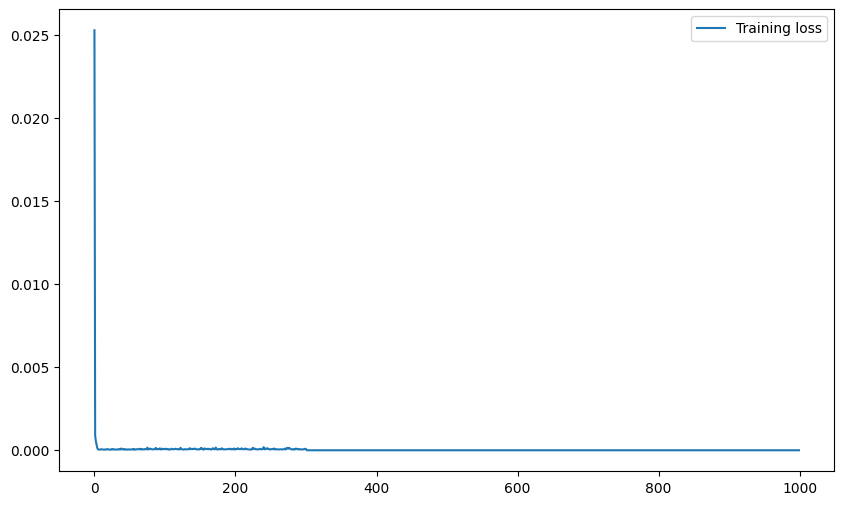

In [26]:
fig=plt.figure(figsize=(10, 6))
plt.plot(train_hist, label='Training loss')
plt.legend()
plt.show()

In [27]:
path="data/lstm_samsumg.pth"
torch.save(model.state_dict(), path)

In [28]:
model=Net(data_dim, hidden_dim, seq_length, output_dim, 1).to(device)
model.load_state_dict(torch.load(path), strict=False)
model.eval()

Net(
  (lstm): LSTM(6, 10, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
with torch.no_grad():
    pred=[]
    for pr in range(len(testX_tensor)):
        model.reset_hidden_state()
        predicted=model(torch.unsqueeze(testX_tensor[pr],0))
        predicted=torch.flatten(predicted).item()
        pred.append(predicted)

    pred_inverse=scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    testY_inverse=scaler_y.inverse_transform(testY_tensor)

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAe SCORE:', MAE(pred_inverse, testY_inverse))

MAe SCORE: 794.2241575796754


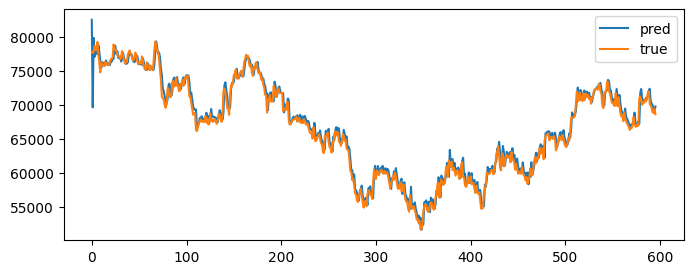

In [30]:
fig=plt.figure(figsize=(8,3))
plt.plot(np.arange(len(pred_inverse)), pred_inverse, label='pred')
plt.plot(np.arange(len(testY_inverse)), testY_inverse, label='true')
plt.legend()
plt.show()
